In [1]:
import os

# Set all Hugging Face cache directories to workspace
cache_dir = '/workspace/huggingface_cache'
os.environ['HF_HOME'] = cache_dir
os.environ['TRANSFORMERS_CACHE'] = cache_dir
os.environ['HF_DATASETS_CACHE'] = cache_dir

from src.evals import *
from src.methods import *
from src.plotting import *

/workspace/new_projects/.venv/lib/python3.11/site-packages/promptsource/templates.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/workspace/new_projects/.venv/lib/python3.11/site-packages/transformers/utils/hub.py:111: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


Split: 100 train, 100 test examples
All results are already saved, skipping model computation
Running method: supervised
Running method: ccs
Running method: fabiens_method
Running method: random
Split: 100 train, 100 test examples
All results are already saved, skipping model computation
Running method: supervised
Running method: ccs
Running method: fabiens_method
Running method: random
Split: 100 train, 100 test examples
Some results missing, computing activations...
Loading model: meta-llama/Llama-2-13b-chat-hf


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Detected positive token: 'positive' (ID: 6374)
Detected negative token: 'negative' (ID: 8178)
Computing activations for all prompts...


Processing batches:   0%|          | 0/25 [00:00<?, ?it/s]

Processing batches:   0%|          | 0/25 [00:00<?, ?it/s]

Running method: supervised
Running method: ccs
Running method: fabiens_method
Starting Fabien co-training: 100 samples, 20 iterations


Fabien Co-Training:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/256 [00:00<?, ?it/s]

Training complete. Final labels: 51/100 positive
Running method: random
Split: 100 train, 100 test examples
Some results missing, computing activations...
Loading model: meta-llama/Llama-2-13b-chat-hf
Detected positive token: '1' (ID: 29896)
Detected negative token: '2' (ID: 29906)
Computing activations for all prompts...


Processing batches:   0%|          | 0/25 [00:00<?, ?it/s]

Processing batches:   0%|          | 0/25 [00:00<?, ?it/s]

Running method: supervised
Running method: ccs
Running method: fabiens_method
Starting Fabien co-training: 100 samples, 20 iterations


Fabien Co-Training:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/256 [00:00<?, ?it/s]

Training complete. Final labels: 48/100 positive
Running method: random
Split: 100 train, 100 test examples
Some results missing, computing activations...
Loading model: meta-llama/Llama-2-13b-chat-hf
Detected positive token: 'itive' (ID: 3321)
Detected negative token: 'ative' (ID: 1230)
Computing activations for all prompts...


Processing batches:   0%|          | 0/25 [00:00<?, ?it/s]

Processing batches:   0%|          | 0/25 [00:00<?, ?it/s]

Running method: supervised
Running method: ccs
Running method: fabiens_method
Starting Fabien co-training: 100 samples, 20 iterations


Fabien Co-Training:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/256 [00:00<?, ?it/s]

Training complete. Final labels: 62/100 positive
Running method: random
Split: 100 train, 100 test examples
Some results missing, computing activations...
Loading model: meta-llama/Llama-2-13b-chat-hf
Detected positive token: '2' (ID: 29906)
Detected negative token: '1' (ID: 29896)
Computing activations for all prompts...


Processing batches:   0%|          | 0/25 [00:00<?, ?it/s]

Processing batches:   0%|          | 0/25 [00:00<?, ?it/s]

Running method: supervised
Running method: ccs
Running method: fabiens_method
Starting Fabien co-training: 100 samples, 20 iterations


Fabien Co-Training:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/256 [00:00<?, ?it/s]

Training complete. Final labels: 49/100 positive
Running method: random
Split: 100 train, 100 test examples
Some results missing, computing activations...
Loading model: meta-llama/Llama-2-13b-chat-hf
Detected positive token: 'no' (ID: 1217)
Detected negative token: 'yes' (ID: 3582)
Computing activations for all prompts...


Processing batches:   0%|          | 0/25 [00:00<?, ?it/s]

Processing batches:   0%|          | 0/25 [00:00<?, ?it/s]

Running method: supervised
Running method: ccs
Running method: fabiens_method
Starting Fabien co-training: 100 samples, 20 iterations


Fabien Co-Training:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/256 [00:00<?, ?it/s]

Training complete. Final labels: 53/100 positive
Running method: random


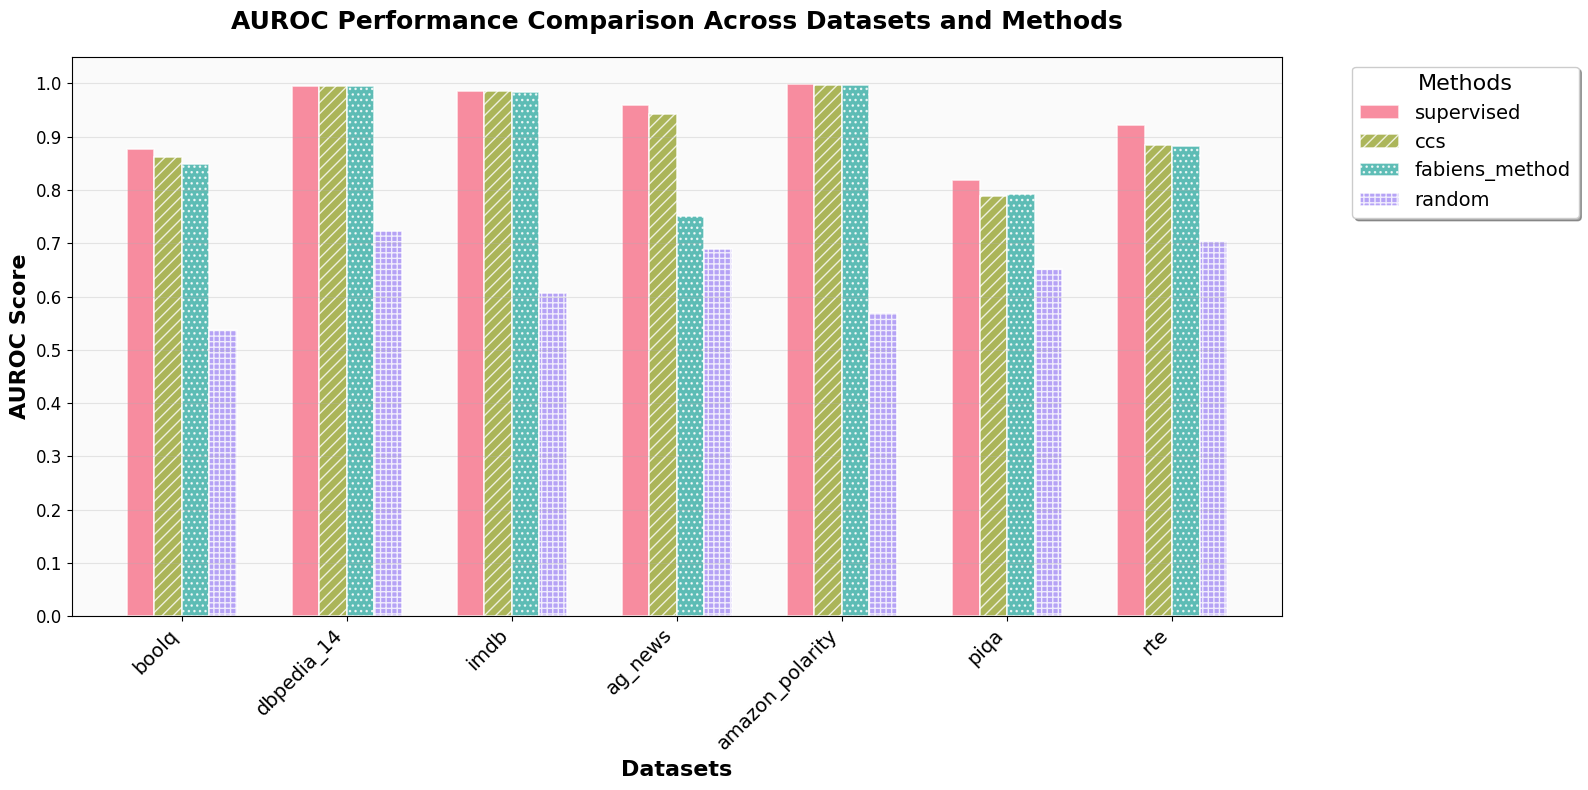

In [2]:
all_available_datasets = [
    "boolq",
    "dbpedia_14",
    "imdb",
    "ag_news",
    "amazon_polarity",
    "piqa",
    #"got_sp_en_trans", # Empty for some reason
    "rte",
    #"got_larger_than",
    #"got_cities",
    #"copa",
]

#model_name = "meta-llama/Llama-2-13b-hf"
#model_name = "meta-llama/Llama-3.1-8B"
model_name = "meta-llama/Llama-2-13b-chat-hf"
    
all_results_dict = {}
for dataset_name in all_available_datasets:
    dataset = load_dataset_for_ccs(
        dataset_name=dataset_name,
        split="train", 
        max_examples=200,
        seed=42,
    )
    all_results_dict[dataset_name] = get_results_on_dataset(
        dataset=dataset,
        model_name=model_name,
        layer_idx=33,
        batch_size=8,
        run_methods=[
            "supervised",
            "ccs",
            "fabiens_method",
            "random",
            
        ]
    )

# Option 1: Modern bar plot
fig1, ax1 = plot_auroc_comparison(all_results_dict, style='modern')
plt.show()